In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1010)

In [2]:
# 生成训练数据
n = 40
X = np.linspace(0, 3 * np.pi, num=n).reshape(-1, 1)
error = np.random.normal(0, 0.1, size=n).reshape(-1, 1)
Y = np.abs(np.sin(X)) + error
Y = np.where(Y > 0.5, 1, 0)
data = np.concatenate((Y, X), axis=1)
data = pd.DataFrame(data, columns=['y', 'x'])

In [3]:
# 训练模型
model = GradientBoostingRegressor(n_estimators=3, max_depth=2, learning_rate=0.8)
model.fit(data[['x']], data['y'])

GradientBoostingRegressor(learning_rate=0.8, max_depth=2, n_estimators=3)

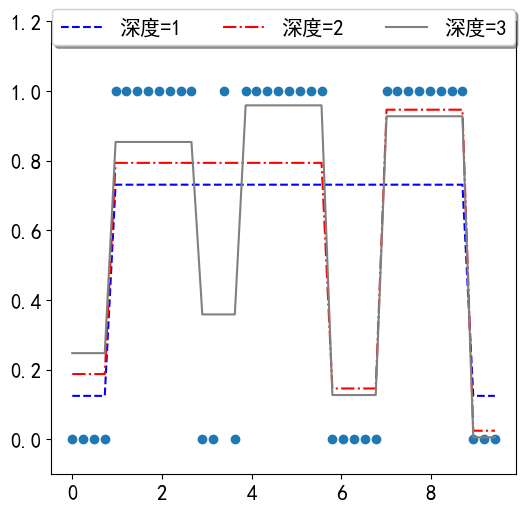

In [4]:
# 将模型结果可视化
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 正确显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 15})
# 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data['x'], data['y'], label='_nolegend_')
ax.set_ylim([-0.1, 1.2])
styles = ['b--', 'r-.', 'gray']
labels = ['深度=1', '深度=2', '深度=3']
for l, s, pred in zip(labels, styles, model.staged_predict(data[['x']])):
    plt.plot(data[['x']], pred, s, label=l)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
                   ncol=3, fancybox=True, shadow=True)
plt.savefig('GBTs.png', dpi=200)
plt.show()